In [2]:
import pandas as pd
import numpy as np

In [33]:
!pip install plotly==5.10.0 

     |████████████████████████████████| 15.2 MB 25 kB/s  eta 0:00:01
  Attempting uninstall: plotly
    Found existing installation: plotly 5.6.0
    Uninstalling plotly-5.6.0:
      Successfully uninstalled plotly-5.6.0


### load datasets

In [3]:
df_video_stats = pd.read_csv("data/videos-stats.csv", index_col = "Unnamed: 0")
df_video_stats.head(5)

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0
1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0
4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0


### analis dataset

In [4]:
df_video_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1881 entries, 0 to 1880
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1881 non-null   object 
 1   Video ID      1881 non-null   object 
 2   Published At  1881 non-null   object 
 3   Keyword       1881 non-null   object 
 4   Likes         1879 non-null   float64
 5   Comments      1879 non-null   float64
 6   Views         1879 non-null   float64
dtypes: float64(3), object(4)
memory usage: 117.6+ KB


In [13]:
df_video_stats.fillna(value = 0)

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0
1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0
4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0
...,...,...,...,...,...,...,...
1876,Should You Learn Machine Learning?,AO6urf07KjE,2021-06-14,machine learning,10259.0,416.0,386360.0
1877,Todos podemos aprender Machine learning,7ClLKBUvmRk,2017-10-08,machine learning,2981.0,72.0,431421.0
1878,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198.0,443.0,226152.0
1879,What is Machine Learning?,f_uwKZIAeM0,2017-01-11,machine learning,0.0,0.0,0.0


In [14]:
#cast time
df_video_stats['Published At'] = pd.to_datetime(df_video_stats['Published At'])

In [15]:
df_video_stats

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0
1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0
4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0
...,...,...,...,...,...,...,...
1876,Should You Learn Machine Learning?,AO6urf07KjE,2021-06-14,machine learning,10259.0,416.0,386360.0
1877,Todos podemos aprender Machine learning,7ClLKBUvmRk,2017-10-08,machine learning,2981.0,72.0,431421.0
1878,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198.0,443.0,226152.0
1879,What is Machine Learning?,f_uwKZIAeM0,2017-01-11,machine learning,NaN,NaN,NaN


In [16]:
df_video_stats.iloc[::, 2:]

,Published At,Keyword,Likes,Comments,Views
0,2022-08-23,tech,3407.0,672.0,135612.0
1,2022-08-24,tech,76779.0,4306.0,1758063.0
2,2022-08-23,tech,63825.0,3338.0,1564007.0
3,2022-08-23,tech,71566.0,1426.0,922918.0
4,2022-08-08,tech,96513.0,5155.0,1855644.0
...,...,...,...,...,...
1876,2021-06-14,machine learning,10259.0,416.0,386360.0
1877,2017-10-08,machine learning,2981.0,72.0,431421.0
1878,2020-02-20,machine learning,5198.0,443.0,226152.0
1879,2017-01-11,machine learning,NaN,NaN,NaN


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10 µs


<AxesSubplot:>

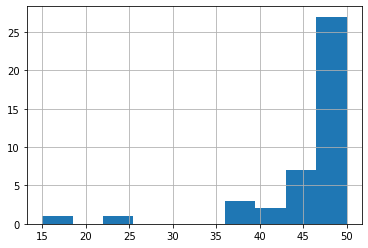

In [31]:
%time
df_video_stats["Keyword"].value_counts().hist()

In [32]:
df_video_stats["Keyword"].value_counts()

machine learning    50
reaction            50
asmr                50
trolling            50
mrbeast             50
cnn                 50
history             50
interview           50
physics             50
minecraft           50
cubes               50
crypto              50
tutorial            50
marvel              50
data science        50
game development    50
xbox                49
sports              49
sat                 49
computer science    48
nintendo            48
tech                48
food                48
how-to              48
business            48
chess               47
biology             47
music               46
literature          46
google              45
movies              45
mukbang             45
bed                 44
gaming              43
apple               42
lofi                41
news                39
finance             39
animals             38
education           24
mathchemistry       15
Name: Keyword, dtype: int64